In [3]:
#I - Importing libraries

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [6]:
Parasitized_cell=os.listdir('/path to cell_images/Parasitized/')

uninfected_cell=os.listdir('/path to cell_images/Uninfected/')

print("parasitized cell:",len(Parasitized_cell))
print("Uninfcted cell:",len(uninfected_cell))

parasitized cell: 13780
Uninfcted cell: 13780


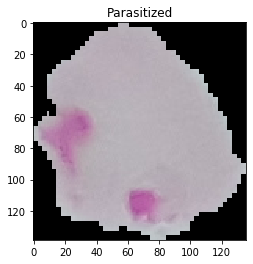

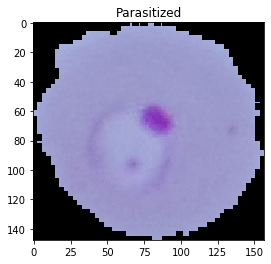

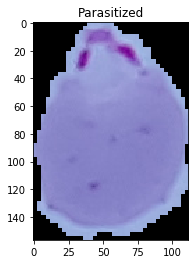

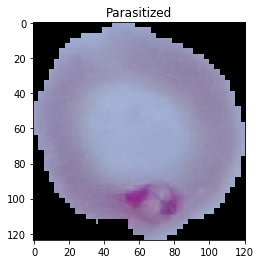

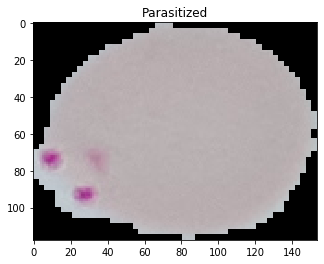

In [8]:
#II - Visualization

for i in range(5):
    img=cv2.imread('/path to cell_images/Parasitized/'+Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

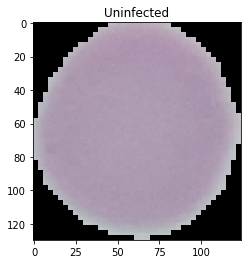

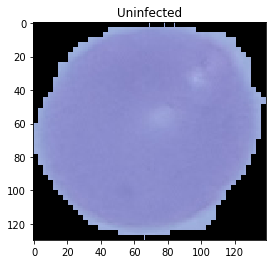

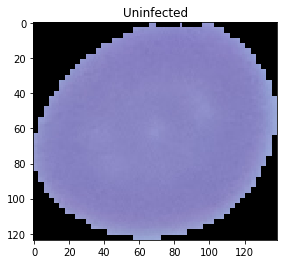

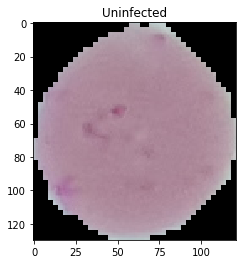

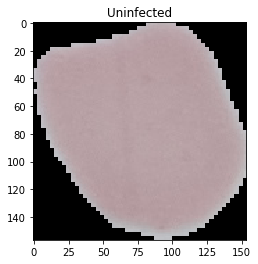

In [10]:
for i in range(5):
    img=cv2.imread('/path to cell_images/Uninfected/'+uninfected_cell[i])
    plt.imshow(img)
    plt.title("Uninfected")
    plt.show()

In [12]:
width = 70
height = 70

In [14]:
#III - Training and Testing data

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [17]:
trainDatagen = datagen.flow_from_directory(directory='/path to/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [21]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [25]:
valDatagen = datagen.flow_from_directory(directory='/path to/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 64,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [37]:
#IV - Creating CNN

model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 68, 68, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)       

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=50,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )

Epoch 1/50
1378/1378 [==============================] - 307s 223ms/step - loss: 0.5131 - accuracy: 0.7111 - val_loss: 0.2247 - val_accuracy: 0.9221
Epoch 2/50
1378/1378 [==============================] - 191s 139ms/step - loss: 0.2163 - accuracy: 0.9294 - val_loss: 0.2034 - val_accuracy: 0.9261
Epoch 3/50
1378/1378 [==============================] - 181s 132ms/step - loss: 0.1897 - accuracy: 0.9390 - val_loss: 0.1909 - val_accuracy: 0.9321
Epoch 4/50
1378/1378 [==============================] - 182s 132ms/step - loss: 0.1743 - accuracy: 0.9425 - val_loss: 0.1575 - val_accuracy: 0.9399
Epoch 5/50
1378/1378 [==============================] - 181s 131ms/step - loss: 0.1707 - accuracy: 0.9449 - val_loss: 0.1879 - val_accuracy: 0.9325
Epoch 6/50
1378/1378 [==============================] - 182s 132ms/step - loss: 0.1679 - accuracy: 0.9434 - val_loss: 0.1850 - val_accuracy: 0.9319
Epoch 7/50
1378/1378 [==============================] - 186s 135ms/step - loss: 0.1604 - accuracy: 0.9476 - val_

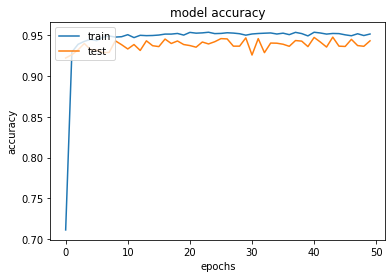

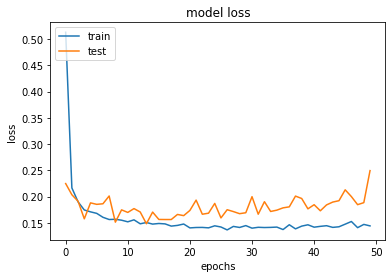

In [44]:
#V - Plotting the accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

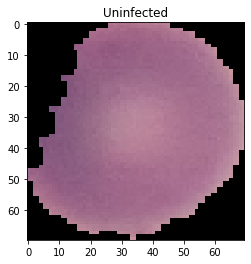

In [50]:
# - Testing our model

testimg_path="path to any cell image for testing"
img=image.load_img(testimg_path,target_size=(70,70))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Parasitized")
else:
    plt.title("Uninfected")